<a href="https://colab.research.google.com/github/BillHuynh/DataScienceProjects/blob/master/Exploratory_Data_Analysis_Heart_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis of patients with risk of Heart Problems  

In [ ]:
#importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#csv file will be located in google drive
#File should be placed in main google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploratory Data Analysis**

In [ ]:
#reading the CSV file from main google drive folder the csv file should be in main google drive 
heart_df = pd.read_csv("/content/drive/MyDrive/A1_heart_disease_dataset.csv")

In [ ]:
# dimensions of the csv file
print("Dimensions before :", heart_df.shape)
print("_____________________________________________________________________________________________")
#first 5 rows of csv file
heart_df.head()

Dimensions before : (303, 14)
_____________________________________________________________________________________________


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
#removing all rows with the state column of 0
heart_df1 = heart_df[heart_df.state != 0]
print("Dimensions before :", heart_df.shape)
print("Dimensions after :", heart_df1.shape)

Dimensions before : (303, 14)
Dimensions after : (143, 14)


# FIND MISSING VALUES


In [ ]:
#display any missing values in CSV
heart_missing_data = heart_df1[heart_df1.isnull().any(axis=1)]
#dimensions of all the Nan rows in the csv
print(heart_missing_data.shape)
heart_missing_data.head(200)


(14, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
6,62.0,F,NaN,140.0,268.0,no,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,54.0,M,nap,150.0,232.0,no,2.0,165.0,0.0,1.6,1.0,0.0,7.0,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,57.0,M,asp,132.0,207.0,no,0.0,168.0,1.0,0.0,1.0,NaN,7.0,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replaces all continous NaN columns with minumum value
heart_df2 = heart_df1.fillna(heart_df1.min())
print(heart_df2.shape)
print(heart_df2)

(143, 14)
      age  sex   cp  trestbps   chol  ... oldpeak  slope   ca  thal  state
1    67.0    M  asp     160.0  286.0  ...     1.5    2.0  3.0   3.0    2.0
2    67.0    M  asp     120.0  229.0  ...     2.6    2.0  2.0   7.0    1.0
6    62.0    F  NaN     140.0  268.0  ...     3.6    3.0  2.0   3.0    3.0
8    63.0    M  asp     130.0  254.0  ...     1.4    2.0  1.0   7.0    2.0
9    53.0    M  asp     140.0  203.0  ...     3.1    3.0  0.0   7.0    1.0
..    ...  ...  ...       ...    ...  ...     ...    ...  ...   ...    ...
297  57.0    F  asp     140.0  241.0  ...     0.2    2.0  0.0   7.0    1.0
298  45.0    M  tap     110.0  264.0  ...     1.2    2.0  0.0   7.0    1.0
299  68.0    M  asp     144.0  193.0  ...     3.4    2.0  2.0   7.0    2.0
300  35.0  NaN  NaN     100.0  149.0  ...     0.0    1.0  0.0   0.0    1.0
301  57.0    F  aap     130.0  236.0  ...     0.0    2.0  1.0   3.0    1.0

[143 rows x 14 columns]


In [ ]:
#removes any NaN catergoricals left in csv
heart_df3 = heart_df2.dropna()
print(heart_df3.shape)
print(heart_df3)

(134, 14)
      age sex   cp  trestbps   chol  ... oldpeak  slope   ca  thal  state
1    67.0   M  asp     160.0  286.0  ...     1.5    2.0  3.0   3.0    2.0
2    67.0   M  asp     120.0  229.0  ...     2.6    2.0  2.0   7.0    1.0
8    63.0   M  asp     130.0  254.0  ...     1.4    2.0  1.0   7.0    2.0
9    53.0   M  asp     140.0  203.0  ...     3.1    3.0  0.0   7.0    1.0
12   56.0   M  nap     130.0  256.0  ...     0.6    2.0  1.0   6.0    2.0
..    ...  ..  ...       ...    ...  ...     ...    ...  ...   ...    ...
296  59.0   M  asp     164.0  176.0  ...     1.0    2.0  2.0   6.0    3.0
297  57.0   F  asp     140.0  241.0  ...     0.2    2.0  0.0   7.0    1.0
298  45.0   M  tap     110.0  264.0  ...     1.2    2.0  0.0   7.0    1.0
299  68.0   M  asp     144.0  193.0  ...     3.4    2.0  2.0   7.0    2.0
301  57.0   F  aap     130.0  236.0  ...     0.0    2.0  1.0   3.0    1.0

[134 rows x 14 columns]


In [ ]:
#The median BEFORE/AFTER removing Nan
print("The median BEFORE removing Nan")
print(heart_df2.median(axis=0))
print("The median AFTER removing Nan")
print(heart_df3.median(axis=0))

The median BEFORE removing Nan
age          57.0
trestbps    130.0
chol        247.0
restecg       2.0
thalach     141.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64
The median AFTER removing Nan
age          58.0
trestbps    131.0
chol        249.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64


# DATA TYPES

In [ ]:
#check which values can be turned from float to int
print(heart_df3.head(20))
print(heart_df3.dtypes)

     age sex   cp  trestbps   chol  ... oldpeak  slope   ca  thal  state
1   67.0   M  asp     160.0  286.0  ...     1.5    2.0  3.0   3.0    2.0
2   67.0   M  asp     120.0  229.0  ...     2.6    2.0  2.0   7.0    1.0
8   63.0   M  asp     130.0  254.0  ...     1.4    2.0  1.0   7.0    2.0
9   53.0   M  asp     140.0  203.0  ...     3.1    3.0  0.0   7.0    1.0
12  56.0   M  nap     130.0  256.0  ...     0.6    2.0  1.0   6.0    2.0
22  58.0   M  aap     120.0  284.0  ...     1.8    2.0  0.0   3.0    1.0
23  58.0   M  nap     132.0  224.0  ...     3.2    1.0  2.0   7.0    3.0
24  60.0   M  asp     130.0  206.0  ...     2.4    2.0  2.0   7.0    4.0
29  40.0   M  asp     110.0  167.0  ...     2.0    2.0  0.0   7.0    3.0
31  60.0   M  asp     117.0  230.0  ...     1.4    1.0  2.0   7.0    2.0
32  64.0   M  nap     140.0  335.0  ...     0.0    1.0  0.0   3.0    1.0
36  43.0   M  asp     120.0  177.0  ...     2.5    2.0  0.0   7.0    3.0
37  57.0   M  asp     150.0  276.0  ...     0.6    

In [ ]:
#changing floats to int
heart_df3[["age","trestbps","chol","restecg","thalach","exang","slope","ca","thal","state"]] = heart_df3[["age","trestbps","chol","restecg","thalach","exang","slope","ca","thal","state"]].astype(int)
# print all the varibles that have changed to INT
print(heart_df3.select_dtypes(int).columns)


Index(['age', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal', 'state'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# CHECKING MALES/FEMALE HIGH RISK

In [ ]:
heart_df4 = heart_df3[heart_df.state == 4]
total = heart_df3.state[heart_df.state == 4].count()
male = heart_df4.sex[heart_df4.sex == "M"].count()/total*100
female = heart_df4.sex[heart_df4.sex == "F"].count()/total*100
print(heart_df4.head(20))

     age sex   cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  state
24    60   M  asp       130   206   no  ...      1      2.4      2   2     7      4
40    65   F  asp       150   225   no  ...      0      1.0      2   3     7      4
45    58   M  nap       112   230   no  ...      0      2.5      2   1     7      4
47    50   M  asp       150   243   no  ...      0      2.6      2   0     7      4
121   63   F  asp       150   407   no  ...      0      4.0      2   3     7      4
136   70   M  asp       145   174   no  ...      1      2.6      3   0     7      4
146   57   M  asp       165   289  yes  ...      0      1.0      2   3     7      4
153   55   M  asp       160   289   no  ...      1      0.8      2   1     7      4
161   77   M  asp       125   304   no  ...      1      0.0      1   3     3      4
174   64   M  asp       145   212   no  ...      0      2.0      2   2     6      4
211   38   M  tap       120   231   no  ...      1      3.8      2   0     7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
print("There are a total of "+ str(total) + " people who are at the highest risk")
print("The ratio of females who are at highest risk is " + str(female) + "%" )
print("The ratio of male who are at highest risk is " + str(male) + "%" )

There are a total of 13 people who are at the highest risk
The ratio of females who are at highest risk is 15.384615384615385%
The ratio of male who are at highest risk is 84.61538461538461%


# CHECKING PATERNS BETWEEN thalach VS state

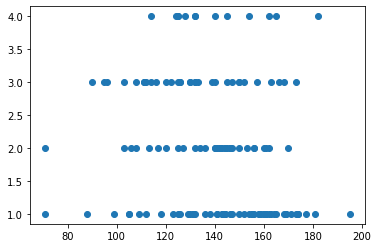

In [ ]:
x = heart_df3["thalach"]
y = heart_df3["state"]
plt.scatter(x,y)

In [1]:
#from the given data and scatter plot there does not seem to appear to have any relationship bewteen state and thalach

# FINDING MEAN BASED ON CHO


In [2]:
male_block = heart_df3[heart_df3.sex == "M"]
female_block = heart_df3[heart_df3.sex == "F"]
print("The Average cholesterol level in males for 0 blocked is " + str(male_block.chol[male_block.ca == 0].mean()) + " mg/dl")
print("The Average cholesterol level in males for 1 blocked is " + str(male_block.chol[male_block.ca == 1].mean()) + " mg/dl")
print("The Average cholesterol level in males for 2 blocked is " + str(male_block.chol[male_block.ca == 2].mean()) + " mg/dl")
print("The Average cholesterol level in males for 3 blocked is " + str(male_block.chol[male_block.ca == 3].mean()) + " mg/dl")
print("----------------------------------------------------------------------------------------------------")
print("The Average cholesterol level in females for 0 blocked is " + str(female_block.chol[female_block.ca == 0].mean()) + " mg/dl")
print("The Average cholesterol level in females for 1 blocked is " + str(female_block.chol[female_block.ca == 1].mean()) + " mg/dl")
print("The Average cholesterol level in females for 2 blocked is " + str(female_block.chol[female_block.ca == 2].mean()) + " mg/dl")
print("The Average cholesterol level in females for 3 blocked is " + str(female_block.chol[female_block.ca == 3].mean()) + " mg/dl")
print("----------------------------------------------------------------------------------------------------")
print("An increase in blocked vessels correlates with an average increase in choleserol in males, However it is not a linear relationship with females and a linear correlation cannot be established ")

NameError: ignored

# SUB-SELECTING PARTICIPANTS AT RISK

In [ ]:
heart_df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67,M,asp,160,286,no,2,108,1,1.5,2,3,3,2
2,67,M,asp,120,229,no,2,129,1,2.6,2,2,7,1
8,63,M,asp,130,254,no,2,147,0,1.4,2,1,7,2
9,53,M,asp,140,203,yes,2,155,1,3.1,3,0,7,1
12,56,M,nap,130,256,yes,2,142,1,0.6,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,59,M,asp,164,176,yes,2,90,0,1.0,2,2,6,3
297,57,F,asp,140,241,no,0,123,1,0.2,2,0,7,1
298,45,M,tap,110,264,no,0,132,0,1.2,2,0,7,1
299,68,M,asp,144,193,yes,0,141,0,3.4,2,2,7,2


In [ ]:
#Finding all patients at risk
heart_df5 = heart_df3[heart_df3.state != 0]
#finding the total number 
heart_df5.age.count()
#finding abnormal BP ECG pain
heart_df6 = heart_df5[(heart_df5["cp"] == "asp") & (heart_df5["fbs"] == "yes") & (heart_df5["restecg"] != 0 )]
print(str(heart_df6.age.count()/heart_df5.age.count()*100)+ "%")

8.208955223880597%


# FINDING AVERAGE

In [ ]:
heart_df7 = heart_df3[heart_df3.slope == 1]
heart_df8 = heart_df3[heart_df3.slope == 3]
df_mean1 = heart_df7["trestbps"].mean()
df_mean2 = heart_df8["trestbps"].mean()
print("The average blood pressure for up sloping ST is " + str(df_mean1))
print("The average blood pressure for down sloping ST is " + str(df_mean2))

The average blood pressure for up sloping ST is 131.57894736842104
The average blood pressure for down sloping ST is 143.9


# GROUPING PARTICIPANTS BY AGE

In [ ]:
print(heart_df3.age.min())
print(heart_df3.age.max())

35
77


In [ ]:
heart_data = {'Heart Rate':[heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40)].thalach.mean(),
                      heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50)].thalach.mean(),
                      heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60)].thalach.mean(), 
                      heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70)].thalach.mean(),
                      heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80)].thalach.mean()],
        'Blood Pressure':[heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40)].trestbps.mean(),
                          heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50)].trestbps.mean(),
                          heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60)].trestbps.mean(),
                          heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70)].trestbps.mean(),
                          heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80)].trestbps.mean()],
        'Cholesterol Level':[heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40)].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50)].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60)].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70)].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80)].chol.mean()]}

heart_df9 = pd.DataFrame(heart_data,index =['29-39 age',
                                '40-49 age',
                                '50-59 age',
                                '60-69 age',
                                '70-80 age'])
#print the dataframe
print(heart_df9)

           Heart Rate  Blood Pressure  Cholesterol Level
29-39 age  152.000000      121.000000         232.500000
40-49 age  142.476190      124.095238         240.333333
50-59 age  139.466667      138.150000         253.800000
60-69 age  137.800000      135.022222         254.044444
70-80 age  127.000000      140.000000         267.250000


# FINDING RELATIONSHIPS

In [ ]:
heart_malefemale = {'Male Cholesterol Level':[heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40) & (heart_df3["sex"] == "M")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50) & (heart_df3["sex"] == "M")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60) & (heart_df3["sex"] == "M")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70) & (heart_df3["sex"] == "M")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80) & (heart_df3["sex"] == "M")].chol.mean()],
              'Female Cholesterol Level':[heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40) & (heart_df3["sex"] == "F")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50) & (heart_df3["sex"] == "F")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60) & (heart_df3["sex"] == "F")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70) & (heart_df3["sex"] == "F")].chol.mean(),
                          heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80) & (heart_df3["sex"] == "F")].chol.mean()]}


In [ ]:
print(heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40) & (heart_df3["sex"] == "F")].chol.count())
print(heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80) & (heart_df3["sex"] == "F")].chol.count())
heart_df11 = pd.DataFrame(heart_malefemale)
#print dataframe with Male and female average cholesterol level
print(heart_df11)

0
0
   Male Cholesterol Level  Female Cholesterol Level
0                  232.50                       NaN
1                  235.30                341.000000
2                  248.48                280.400000
3                  248.00                272.727273
4                  267.25                       NaN


In [ ]:
# From age 30 -80 as age increases in males the average Male Cholesterol Level increases aswell, positive corelation
# From age 40-70 as age increases in female the average Male Cholesterol Level increases aswell, positive corelation
# no data for females age 30-40 and 70-80

# FINDING RELATIONSHIPS 

In [ ]:
x1 = heart_df3["chol"]
y1 = heart_df3["trestbps"]
x2 = heart_df3["chol"]
y2 = heart_df3["thalach"]


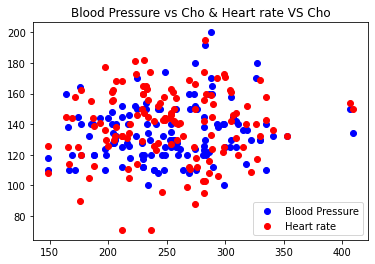

In [ ]:
plt.scatter(x1,y1, c='b', label='Blood Pressure')
plt.scatter(x2, y2, c='r', label='Heart rate')
plt.legend(loc='lower right')
plt.title('Blood Pressure vs Cho & Heart rate VS Cho')
plt.show()


# FINDING RELATIONSHIPS

In [ ]:
x3 = [male_block.chol[male_block.ca == 0].mean(),
      male_block.chol[male_block.ca == 1].mean(),
      male_block.chol[male_block.ca == 2].mean(),
      male_block.chol[male_block.ca == 3].mean()]
x4 = [female_block.chol[female_block.ca == 0].mean(),
      female_block.chol[female_block.ca == 1].mean(),
      female_block.chol[female_block.ca == 2].mean(),
      female_block.chol[female_block.ca == 3].mean(),]
blocked_number = [0,1,2,3]



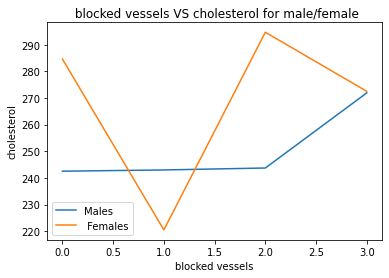

In [ ]:
plt.plot(blocked_number, x3, label = "Males")
plt.plot(blocked_number, x4, label = " Females")
plt.xlabel('blocked vessels')
plt.ylabel('cholesterol')
plt.title(' blocked vessels VS cholesterol for male/female')
plt.legend()
plt.show()

In [ ]:
# Males have lower CHOL levels than females at 0 blocked vessels
# Males have higher CHOL levels than females at 1 blocked vessels
# Males have lower CHOL levels than females at 2 blocked vessels
# Males have the same CHOL levels as females at 3 blocked vessels

# BINNING GROUPS

In [ ]:
x5 = heart_df9['Heart Rate']
x6 = heart_df9['Blood Pressure']
age_groups = ['29-39 age',
              '40-49 age',
              '50-59 age',
              '60-69 age',
              '70-80 age']



As age groups increases average heart rate decreases for all age groups


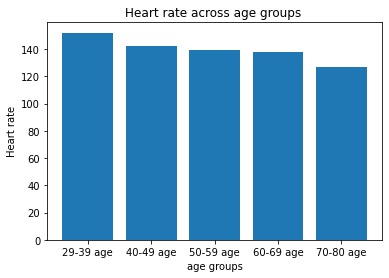

In [ ]:
plt.bar(age_groups,x5)
plt.xlabel('age groups')
plt.ylabel('Heart rate')
plt.title('Heart rate across age groups ')
print("As age groups increases average heart rate decreases for all age groups")

Text(0.5, 1.0, 'Blood Pressure across age groups ')

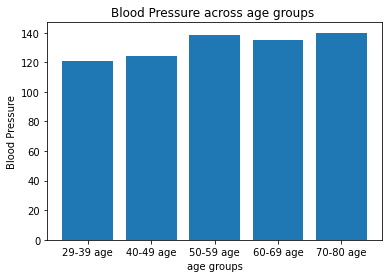

In [ ]:
plt.bar(age_groups,x6)
plt.xlabel('age groups')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure across age groups ')


Text(0.5, 1.0, 'Total Number across age groups ')

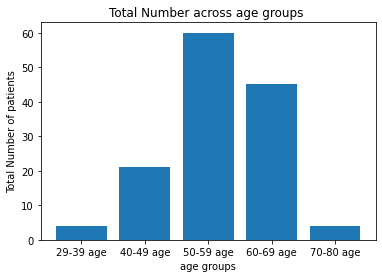

In [ ]:
            TotalNumber = [heart_df3[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40)].trestbps.count(),
                          heart_df3[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50)].trestbps.count(),
                          heart_df3[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60)].trestbps.count(),
                          heart_df3[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70)].trestbps.count(),
                          heart_df3[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80)].trestbps.count()]
plt.bar(age_groups,TotalNumber)
plt.xlabel('age groups')
plt.ylabel('Total Number of patients')
plt.title('Total Number across age groups ')            

In [ ]:
#As age groups increases average heart rate decreases for all age groups

#As age groups increases average Cholesterol level increases for all age groups except 
# for 60-69 age group for which the average falls below the 50-59 age group

# the number of total patients increases in the range from 29-59
#then decreases from 59 - 80 years old 



# SUBGROUPING FEMALE/MALES AT RISK

In [ ]:
num_male_patients = [heart_df3.age[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40) & (heart_df3["sex"] == "M")].count(),
                       heart_df3.age[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50) & (heart_df3["sex"] == "M")].count(),
                       heart_df3.age[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60) & (heart_df3["sex"] == "M")].count(),
                       heart_df3.age[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70) & (heart_df3["sex"] == "M")].count(),
                       heart_df3.age[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80) & (heart_df3["sex"] == "M")].count()]

num_female_patients = [heart_df3.age[(heart_df3["age"] >= 30) & (heart_df3["age"] < 40) & (heart_df3["sex"] == "F")].count(),
                       heart_df3.age[(heart_df3["age"] >= 40) & (heart_df3["age"] < 50) & (heart_df3["sex"] == "F")].count(),
                       heart_df3.age[(heart_df3["age"] >= 50) & (heart_df3["age"] < 60) & (heart_df3["sex"] == "F")].count(),
                       heart_df3.age[(heart_df3["age"] >= 60) & (heart_df3["age"] < 70) & (heart_df3["sex"] == "F")].count(),
                       heart_df3.age[(heart_df3["age"] >= 70) & (heart_df3["age"] < 80) & (heart_df3["sex"] == "F")].count()]
heart_df9['num_male_patients'] = num_male_patients
heart_df9['num_female_patients'] = num_female_patients

 



In [ ]:
#save the csv to same directory 
heart_df9.to_csv("age_group_stat.csv", encoding='utf-8', index=False )

# SAVING DATASET

In [ ]:
heart_df1.shape
ttt = heart_df1["state"].fillna(method='ffill')
print(heart_df1.state.isna().sum())

10


In [ ]:
heart_df1["state"] = heart_df1["state"].fillna(method='ffill')
print(heart_df1.state.isna().sum())
#the csv can be found main google drive folder
heart_df1.to_csv("clean_data.csv", encoding='utf-8', index=False )

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
